In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats

In [155]:
historical_url = "https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
fear_url = "https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

df1 = pd.read_csv(historical_url)
df2 = pd.read_csv(fear_url)
df1.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [156]:
df2.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [159]:
df1.duplicated().sum()

np.int64(0)

In [160]:
df2.duplicated().sum()

np.int64(0)

* There is no missing and null values in both dataset.

In [161]:
# Converting all cols name to lower case
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [162]:
# Clean up column names: replace spaces with underscores for easier access in code
df1.columns = [cols.replace(' ','_') for cols in df1.columns]
df2.columns = [cols.replace(' ','_')for cols in df2.columns]

#### clean and preparing historical and fear greed dataset

In [163]:
# Convert the Timestamp IST to a proper datetime object
df1['trade_date'] = pd.to_datetime(df1['timestamp_ist'], dayfirst=True).dt.floor('D')
df2['date'] = pd.to_datetime(df2['date'])

In [164]:
# Merging 
merged_df = pd.merge(df1,df2,how='left',left_on='trade_date',right_on='date')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp_ist     211224 non-null  object        
 7   start_position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed_pnl        211224 non-null  float64       
 10  transaction_hash  211224 non-null  object        
 11  order_id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  trad

In [165]:
merged_df['classification'].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [166]:
print("\nSummary by Sentiment:")
summary = merged_df.groupby('classification')['closed_pnl'].agg(['sum', 'mean', 'count']).round(2)
print(summary)


Summary by Sentiment:
                       sum   mean  count
classification                          
Extreme Fear     739110.25  34.54  21400
Extreme Greed   2715171.31  67.89  39992
Fear            3357155.44  54.29  61837
Greed           2150129.27  42.74  50303
Neutral         1292920.68  34.31  37686


In [167]:
# Group by sentiment classification and calculate key performance metrics
performance = merged_df.groupby('classification').agg(total_pnl=('closed_pnl','sum'),
                                                      average_pnl_per_trade=('closed_pnl','mean'),
                                                      number_of_traders=('closed_pnl','count'),
                                                      total_volume_USD=('size_usd','sum'),
                                                      win_rate=('closed_pnl',lambda x: (x>0).sum()/len(x)*100)
                                                     ).round(2).reset_index()

In [168]:
performance = performance.sort_values('number_of_traders',ascending=False)
print(performance)

  classification   total_pnl  average_pnl_per_trade  number_of_traders  \
2           Fear  3357155.44                  54.29              61837   
3          Greed  2150129.27                  42.74              50303   
1  Extreme Greed  2715171.31                  67.89              39992   
4        Neutral  1292920.68                  34.31              37686   
0   Extreme Fear   739110.25                  34.54              21400   

   total_volume_USD  win_rate  
2      4.833248e+08     42.08  
3      2.885825e+08     38.48  
1      1.244652e+08     46.49  
4      1.802421e+08     39.70  
0      1.144843e+08     37.06  


In [169]:
# Displaying profit and loss by sentiment
fig = px.bar(performance, x='classification',y='total_pnl',
              title='Total Profit/Loss by Market Sentiment',color='classification')
fig.update_layout(width=800, height=500)
fig.show()

#### Most Profitable Sentiment (total_pnl):
- **Fear** made the highest **profit (\$3.36M\)**, followed by **Extreme Greed (\$2.72M\)** and **Greed (\$2.15M\)**.
- The most money is made when the market is in **Fear**. 

In [170]:
# Displaying Average PnL per Trade by Sentiment
fig = px.bar(performance, x='classification',y='average_pnl_per_trade',
              title='Average Profit/Loss per Trade by Market Sentiment',color='classification')
fig.update_layout(width=800, height=500)
fig.show()

#### Most Profitable per Trade average pnl per trade:
- **Extreme Greed** has the highest average profit per trade **(\$67.89\)**, significantly higher than others.
- **Fear** is second **(\$54.29\)**, then **Greed (\$42.74\)**.

In [171]:
# Display Trade Activity by Sentiment
fig = px.bar(performance, x='classification',y='number_of_traders',
              title='Number of Trades by Market Sentiment',color='classification')
fig.update_layout(width=800, height=500)
fig.show()

#### Trading Activity Number of Trades:
- Fear has the highest trading volume 61,837 trades, followed by Greed 50,303 trades.

In [172]:
# Display Win Rate by Sentiment
fig = px.bar(performance, x='classification',y='win_rate',
              title='Win Rate by Market Sentiment',color='classification')
fig.update_layout(width=800, height=500)
fig.show()

#### Win Rate Analysis:
- **Extreme Greed** has the highest win rate 46.49%, followed by **Fear** 42.08%.
- **Extreme Fear** has the lowest win rate 37.06%.

#### statistical picture

In [173]:
# Extract pnl values for different sentiments 
extreme_fear_pnl = merged_df.loc[merged_df['classification']== 'Extreme Fear','closed_pnl'].dropna()
fear_pnl = merged_df.loc[merged_df['classification']=='Fear','closed_pnl'].dropna()
greed_pnl = merged_df.loc[merged_df['classification']== 'Greed','closed_pnl'].dropna()
extreme_greed_pnl = merged_df.loc[merged_df['classification']=='Extreme Greed','closed_pnl'].dropna()
neutral_pnl = merged_df.loc[merged_df['classification']=='Neutral','closed_pnl'].dropna()

In [174]:
# Perform t-test between Extreme Fear and greed
t_stat,p_value= stats.ttest_ind(extreme_fear_pnl, greed_pnl, equal_var=False)

print(f"T test between extreme fear and greed:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference is statistically significant (p < 0.05)")
else:
    print("The difference is not statistically significant")

T test between extreme fear and greed:
T-statistic: -0.890, P-value: 0.3736
The difference is not statistically significant


In [176]:
# Test Extreme Greed vs others (since it had the highest average PnL)
t_stat, p_value = stats.ttest_ind(extreme_greed_pnl, extreme_fear_pnl, equal_var=False)
print(f"Extreme Greed vs Extreme Fear: p-value = {p_value:.4f}")

t_stat, p_value = stats.ttest_ind(extreme_greed_pnl, fear_pnl, equal_var=False)
print(f"Extreme Greed vs Fear: p-value = {p_value:.4f}")

Extreme Greed vs Extreme Fear: p-value = 0.0001
Extreme Greed vs Fear: p-value = 0.0113


#### Output (Statistical Test Results):

**Extreme Fear vs Greed**:
- The average profit difference is not statistically significant (p = 0.37).
- The small difference we see might just be random chance rather than a real performance gap.

**Extreme Greed vs Extreme Fear**:
- The difference is statistically significant (p = 0.0001).
- This is very unlikely to be due to random chance, suggesting Extreme Greed traders perform better.

**Extreme Greed vs Fear**:
- Significant difference (p = 0.0113).
- Again,Extreme Greed traders likely have higher profits.

#### Dashboard

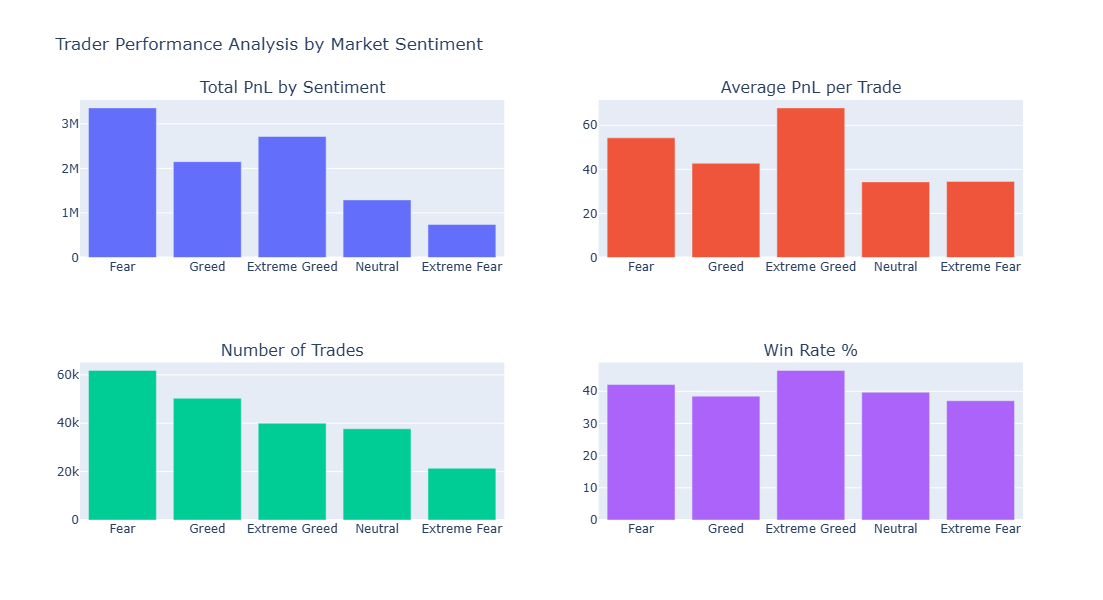

In [182]:
# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Total PnL by Sentiment', 'Average PnL per Trade', 
                                                   'Number of Trades', 'Win Rate %'))

# Add traces
fig.add_trace(go.Bar(x=performance['classification'], 
                    y=performance['total_pnl'], name="Total PnL"), row=1, col=1)
fig.add_trace(go.Bar(x=performance['classification'], 
                    y=performance['average_pnl_per_trade'], name="Avg PnL"), row=1, col=2)
fig.add_trace(go.Bar(x=performance['classification'], 
                    y=performance['number_of_traders'], name="Number of Trades"), row=2, col=1)
fig.add_trace(go.Bar(x=performance['classification'], 
                    y=performance['win_rate'], name="Win Rate %"), row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Trader Performance Analysis by Market Sentiment", showlegend=False)
fig.show()